In [137]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [138]:
df=pd.read_csv('05-insurance_charges.csv')

In [139]:
df.shape

(1338, 7)

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [143]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder

In [144]:
le= LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [145]:
#Feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

df['age']=scaler.fit_transform(df['age'].values.reshape(-1,1))
df['bmi']=scaler.fit_transform(df['bmi'].values.reshape(-1,1))
df['charges']=scaler.fit_transform(df['charges'].values.reshape(-1,1))





In [146]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


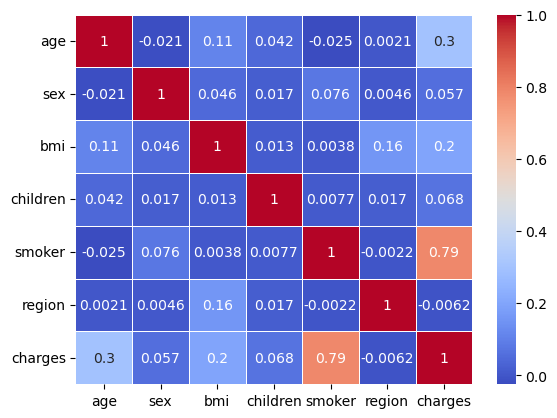

In [147]:
import seaborn as sns
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
df=df.drop('region', axis=1)

In [148]:
#Feature Selection
x=df.iloc[:, :-1]
y=df.iloc[:,df.shape[1]-1]

In [149]:
x.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,3
1,0.000000,1,0.479150,1,0,2
2,0.217391,1,0.458434,3,0,2
3,0.326087,1,0.181464,0,0,1
4,0.304348,1,0.347592,0,0,1


In [150]:
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

In [152]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [153]:
y_pred=model.predict(x_test)


In [154]:
print('Mean squared error:%.2f'% mean_squared_error(y_test, y_pred))
print('Coefficient of determination:%.2f'% r2_score(y_test,y_pred))

Mean squared error:0.01
Coefficient of determination:0.77


In [158]:
df={
    'age':[0.304348],
    'sex':[1],
     'bmi':[0.347592],
     'children':[0],
    'smoker':[0],
     'region':[1],
}
df=pd.DataFrame(df)
val=model.predict(df)
print(val)

[0.07373508]
